# Cleaning Data

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
df = pd.read_csv('cars.csv')

In [43]:
df = df.rename(index=str, columns={'mpg': 'mpg', 
                                   ' cylinders': 'cylinders', 
                                   ' cubicinches': 'cubicinches', 
                                   ' hp': 'hp', 
                                   ' weightlbs': 'weightlbs',  
                                   ' time-to-60': 'time_to_60', 
                                   ' year':'year', 
                                   ' brand': 'brand', })

In [44]:
X = df.copy()
X.drop(['brand'], axis=1, inplace=True)
X = X.convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
X.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time_to_60     0
year           0
dtype: int64

In [46]:
X['cubicinches'].fillna(X['cubicinches'].median(), inplace=True)
X['weightlbs'].fillna(X['weightlbs'].median(), inplace=True)

In [47]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Clustering

In [48]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### K-means

In [49]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0) 
y_kmeans = kmeans.fit_predict(X)
d = {' Europe.': 0, ' Japan.': 1, ' US.': 2, }
y = df['brand'].apply(lambda x: d[x])
accuracy_score(y, y_kmeans)

0.4559386973180077

In [50]:
def draw(k):
    X_temp = X.values
    plt.scatter(X_temp[y_kmeans == 0, k], X_temp[y_kmeans == 0, k+1], s=100, c='blue', label='Europe')
    plt.scatter(X_temp[y_kmeans == 1, k], X_temp[y_kmeans == 1, k+1], s=100, c='red', label='Japan')
    plt.scatter(X_temp[y_kmeans == 2, k], X_temp[y_kmeans == 2, k+1], s=100, c='green', label='US')
    plt.scatter(kmeans.cluster_centers_[:, k], kmeans.cluster_centers_[:, k+1], s=300, c='yellow', label='Centroids')
    plt.title('Clusters of car brands')
    plt.legend()
    plt.show()

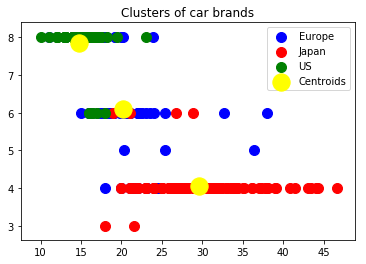

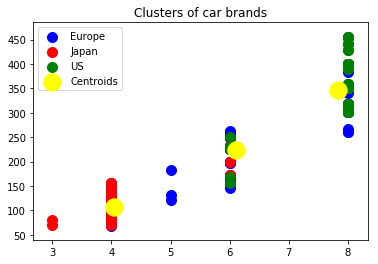

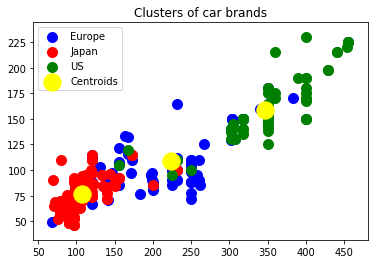

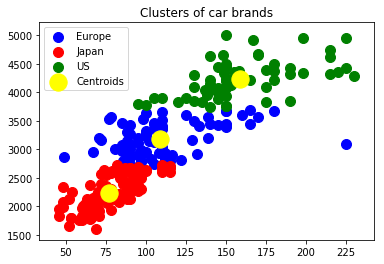

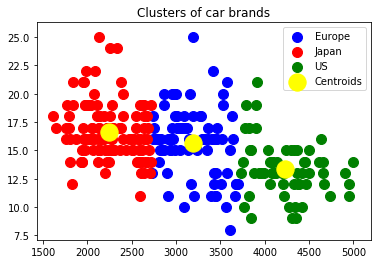

In [51]:
for i in range(5):
    draw(i)

### Hierarchical clustering

In [52]:
agglo = AgglomerativeClustering(n_clusters=3) 
y_agglo = agglo.fit_predict(X)
d = {' Europe.': 1, ' Japan.': 2, ' US.': 0, }
y = df['brand'].apply(lambda x: d[x])
accuracy_score(y, y_agglo)

0.5593869731800766

In [53]:
def draw(k):
    X_temp = X.values
    plt.scatter(X_temp[y_agglo == 0, k], X_temp[y_agglo == 0, k+1], s=100, c='green', label='US')
    plt.scatter(X_temp[y_agglo == 1, k], X_temp[y_agglo == 1, k+1], s=100, c='blue', label='Europe')
    plt.scatter(X_temp[y_agglo == 2, k], X_temp[y_agglo == 2, k+1], s=100, c='red', label='Japan')
    #plt.scatter(agglo.labels_[:, k], labels_[:, k+1], s=300, c='yellow', label='Centroids')
    plt.title('Clusters of car brands')
    plt.legend()
    plt.show()

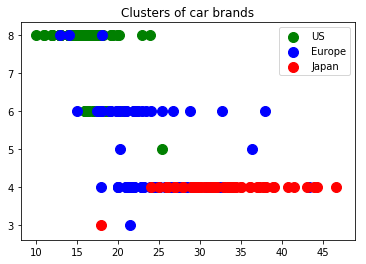

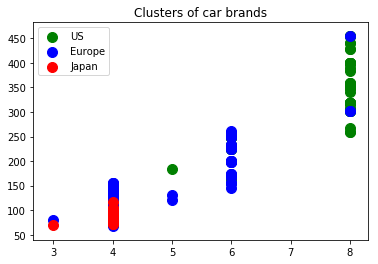

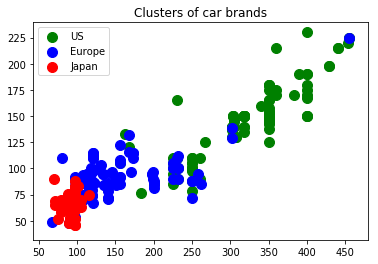

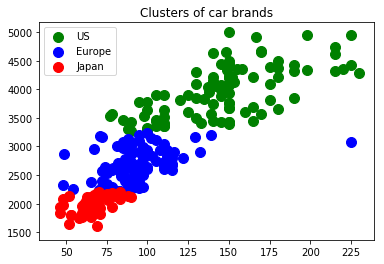

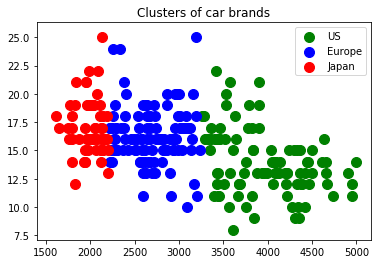

In [54]:
for i in range(5):
    draw(i)

### SVM

In [55]:
svm = SVC(gamma='auto', random_state=0)
cross_val_score(svm, X, y, cv=5, scoring='accuracy').mean()

0.6359829692238127

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [65]:
def draw(k):
    X_temp = X.values
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X)
    plt.scatter(X_temp[y_pred == 0, k], X_temp[y_pred == 0, k+1], s=100, c='green', label='US')
    plt.scatter(X_temp[y_pred == 1, k], X_temp[y_pred == 1, k+1], s=100, c='blue', label='Europe')
    plt.scatter(X_temp[y_pred == 2, k], X_temp[y_pred == 2, k+1], s=100, c='red', label='Japan')
    plt.title('Clusters of car brands')
    plt.legend()
    plt.show()

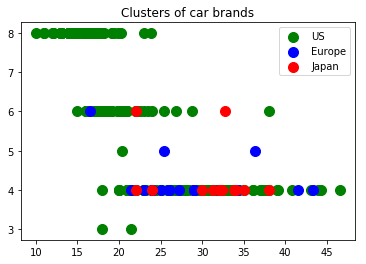

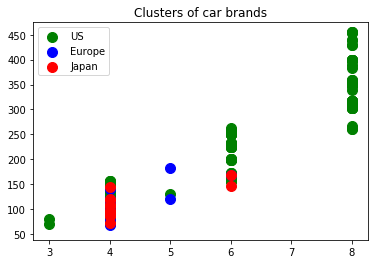

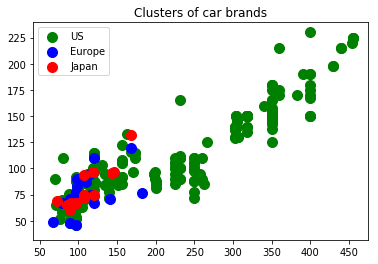

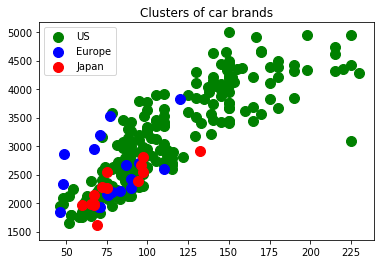

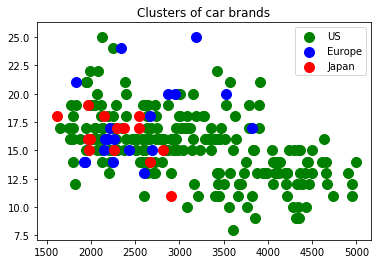

In [66]:
for i in range(5):
    draw(i)